<a href="https://colab.research.google.com/github/SergeyMitrofanov88/Optimization_scripts/blob/main/linear_Opt(LW1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

566.6666666666666 850.0 900.0 642.8571428571429
POINT (263.6363636363635 454.5454545454546)


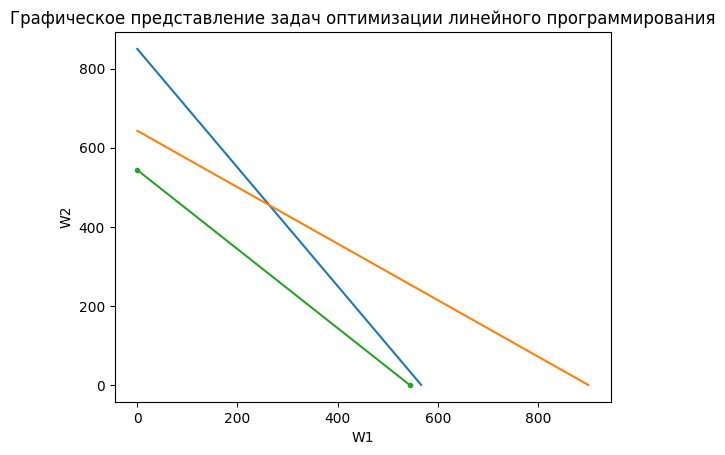

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -21545.45454545454
              x: [ 2.636e+02  4.545e+02]
            nit: 2
          lower:  residual: [ 2.636e+02  4.545e+02]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-2.727e+00 -2.727e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


In [ ]:
from scipy.optimize import linprog
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import numpy as np

#Графическое представление граничных условий
W1 = 3400/6
W2 = 3400/4
W3 = 4500/5
W4 = 4500/7
print(W1, W2, W3, W4)
# Представим координаты в виде полинома
x1 = [W1, 0]
y1 = [0, W2]
x2 = [W3, 0]
y2 = [0, W4]

#Графическое представление целевой функции
#F = 30*x1 + 30*x2 = 10000
x3 = [0, F/30]
y3 = [F/30, 0]

#Создаем график для представления функции
plt.plot(x1, y1, x2, y2)
plt.plot(x3, y3, '.-')
plt.xlabel("W1")
plt.ylabel("W2")
plt.title('Графическое представление задач оптимизации линейного программирования')

#Найдем пересечение двух отрезков, для нахождения точки экстремума и соответственно решения задачи
line1 = LineString([(W1, 0), (0, W2)])
line2 = LineString([(W3, 0), (0, W4)])

print(line1.intersection(line2))

plt.show()

#Решение симплекс-методом в Python
#Записываем коэффициенты при неизвестных целевой функции
obj = [-30, -30]

#Записываем коэффициенты для граничных условий в матричной форме
#Матрица коэффициентов при неизвестных
lhs_ineq = [[6, 4],
            [5, 7]]

#Матрица столбец свободных членов
rhs_ineq = [3400,
            4500]

bnd = [(0, float('inf')),
       (0, float('inf'))]

#Функция для оптимизации симплекс методом
opt = linprog(c=obj, A_ub = lhs_ineq, b_ub = rhs_ineq, bounds=bnd, method="highs")
print(opt)